# Demo SVM <br> <hr>

### Support Vector machine
### binary classification

In [49]:
X = iris.data
y = (iris.target == 2).astype(np.int)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,
                                                   random_state=1)

In [52]:
clf = SVC(random_state=10, kernel = 'linear', verbose=2)
clf.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=2)

In [53]:
print('Training set score : %f' % clf.score(X_train, y_train))
print('Testing set score : %f\n' % clf.score(X_test, y_test))

Training set score : 0.983333
Testing set score : 1.000000



In [54]:
clf.coef_

array([[-0.77526888, -0.51743394,  2.03205246,  2.0729412 ]])

In [60]:
def features_important(coef, feature_names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, feature_names)))
    plt.barh(range(len(feature_names)), imp, align='center')
    plt.yticks(range(len(feature_names)), feature_names)
    plt.show()

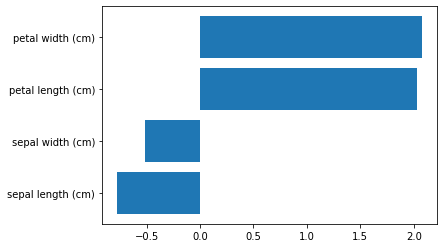

In [61]:
features_important(clf.coef_.ravel(), iris.feature_names)

### multiclass one-v-one

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [5]:
iris = datasets.load_iris()

In [12]:
print(iris.target_names), print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(None, None)

In [13]:
X = iris.data
y = iris.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   shuffle=True, random_state=1)

In [17]:
clf = SVC(decision_function_shape='ovo', random_state = 10, kernel = 'linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
clf.decision_function_shape

'ovo'

In [19]:
print('Training set score : %f' % clf.score(X_train, y_train))
print('Testing set score : %f' % clf.score(X_test, y_test))

Training set score : 0.983333
Testing set score : 1.000000


### multiclass one-v-all

In [20]:
clf = SVC(decision_function_shape='ovr', random_state=10, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
clf.decision_function_shape

'ovr'

In [22]:
print('Training set score : %f' % clf.score(X_train, y_train))
print('Testing set score : %f' % clf.score(X_test, y_test))

Training set score : 0.983333
Testing set score : 1.000000


In [24]:
clf.coef_ # because it one versus all in the first line would be first class vs all

array([[-0.03647945,  0.45194491, -0.87644639, -0.39672978],
       [-0.00704245,  0.17887143, -0.53845563, -0.29219651],
       [ 0.77520826,  0.51760113, -2.03199066, -2.07311894]])

setosa vs all


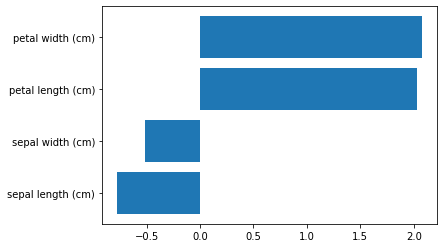

In [63]:
iris_class = 0
print(iris.target_names[iris_class], 'vs all')
features_important(clf.coef_[iris_class], iris['feature_names'])

In [30]:
clf.coef_[0].tolist()

[-0.03647944867942732,
 0.4519449107545561,
 -0.8764463854962624,
 -0.39672977888831185]

### C hyper parameter

In [35]:
kernel_list = ['linear', 'rbf', 'poly']
for kernel in kernel_list:
    clf = SVC(C = 1, decision_function_shape='ovr', random_state=10, kernel = kernel, gamma='auto')
    clf.fit(X_train, y_train)
    
    print('kernel :', kernel)
    print('Training set score : %f' % clf.score(X_train, y_train))
    print('Testing set score : %f\n' % clf.score(X_test, y_test))

kernel : linear
Training set score : 0.983333
Testing set score : 1.000000

kernel : rbf
Training set score : 0.983333
Testing set score : 0.966667

kernel : poly
Training set score : 0.975000
Testing set score : 1.000000



In [36]:
from sklearn.model_selection import cross_val_score

In [40]:
c_list = [10**c for c in range(-6, 7)]

best_score = 0
best_c = 0

# find best c parameter
for c in c_list:
    clf = SVC( C = c, decision_function_shape='ovr', random_state=10, kernel='linear', gamma='auto')
    cv_score = cross_val_score(clf, X_train, y_train, cv=5)
    mean_cv = cv_score.mean()
    
    if mean_cv > best_score:
        best_score = mean_cv
        best_c = c

print(f'Best cv score : {best_score} with Hyper parameter C : {best_c}')

Best cv score : 0.9836666666666666 with Hyper parameter C : 1


In [41]:
clf = SVC( C = best_c, decision_function_shape='ovr', random_state=10, kernel='linear', gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
print('Training set score : %f' % clf.score(X_train, y_train))
print('Testing set score : %f\n' % clf.score(X_test, y_test))

Training set score : 0.983333
Testing set score : 1.000000



In [43]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=10, multi_class='ovr', solver='liblinear')
clf.fit(X_train, y_train)

print('Training set score : %f' % clf.score(X_train, y_train))
print('Testing set score : %f\n' % clf.score(X_test, y_test))

Training set score : 0.958333
Testing set score : 0.833333



# Digital Image Classification <br> <hr>

In [67]:
from sklearn.datasets import load_digits
digits = load_digits()

In [70]:
X = digits.data
y = digits.target

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                   shuffle = True)

In [ ]:
c_list = [10**-6, 1, 10**6]
for c in c_list:
    clf = SVC( C = c, decision_function_shape='ovr', random_state=10,
              kernel='linear', gamma='auto', verbose=2)
    cv_score = cross_val_score(clf, X_train, y_train, cv=5)
    mean_cv = cv_score.mean()
    
    if mean_cv > best_score:
        best_score = mean_cv
        best_c = c

print(f'Best cv score : {best_score} with Hyper parameter C : {best_c}')

In [81]:
c_list = [10**-6, 1, 10**6]
gamma = [10**-6, 1, 10**6]

clf = SVC( C = c_list[2], decision_function_shape='ovr', random_state=10,
kernel='rbf', gamma='auto', verbose=2, max_iter = -1)
clf.fit(X_train, y_train)

print('C :', c_list[0], 'and Gamma :', gamma[2])
print('Training set score : %f' % clf.score(X_train, y_train))
print('Testing set score : %f\n' % clf.score(X_test, y_test))
print("-----------------------------------------------")

[LibSVM]C : 1e-06 and Gamma : 1000000
Training set score : 1.000000
Testing set score : 0.418519

-----------------------------------------------


In [83]:

c_list = [10**-6, 1, 10**6]
degree = [1, 2, 3, 4, 5, 6]
gamma = [10**-6, 1, 10**6]
kernel_list = ['linear', 'poly', 'rbf']
best_score = 0
best_c = 0
best_gamma = 0
best_degree = 0
best_kernel = 0


In [85]:
for kernel in kernel_list:
    for i in c_list:
        for j in gamma:
            if kernel == 'poly':
                for d in degree:
                    print(kernel, i, j, d)

            else:
                print(kernel, i, j)
      # verbose=2
    

linear 1e-06 1e-06
linear 1e-06 1
linear 1e-06 1000000
linear 1 1e-06
linear 1 1
linear 1 1000000
linear 1000000 1e-06
linear 1000000 1
linear 1000000 1000000
poly 1e-06 1e-06 1
poly 1e-06 1e-06 2
poly 1e-06 1e-06 3
poly 1e-06 1e-06 4
poly 1e-06 1e-06 5
poly 1e-06 1e-06 6
poly 1e-06 1 1
poly 1e-06 1 2
poly 1e-06 1 3
poly 1e-06 1 4
poly 1e-06 1 5
poly 1e-06 1 6
poly 1e-06 1000000 1
poly 1e-06 1000000 2
poly 1e-06 1000000 3
poly 1e-06 1000000 4
poly 1e-06 1000000 5
poly 1e-06 1000000 6
poly 1 1e-06 1
poly 1 1e-06 2
poly 1 1e-06 3
poly 1 1e-06 4
poly 1 1e-06 5
poly 1 1e-06 6
poly 1 1 1
poly 1 1 2
poly 1 1 3
poly 1 1 4
poly 1 1 5
poly 1 1 6
poly 1 1000000 1
poly 1 1000000 2
poly 1 1000000 3
poly 1 1000000 4
poly 1 1000000 5
poly 1 1000000 6
poly 1000000 1e-06 1
poly 1000000 1e-06 2
poly 1000000 1e-06 3
poly 1000000 1e-06 4
poly 1000000 1e-06 5
poly 1000000 1e-06 6
poly 1000000 1 1
poly 1000000 1 2
poly 1000000 1 3
poly 1000000 1 4
poly 1000000 1 5
poly 1000000 1 6
poly 1000000 1000000 1
po

In [87]:
from sklearn import datasets
iris = datasets.load_iris()

In [88]:
print(iris.target_names), print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(None, None)

In [90]:
X = iris.data
y = iris.target

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   shuffle = True)

In [95]:
clf = SVC(C=1, decision_function_shape='ovr', random_state=10,
          kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

versicolor vs all


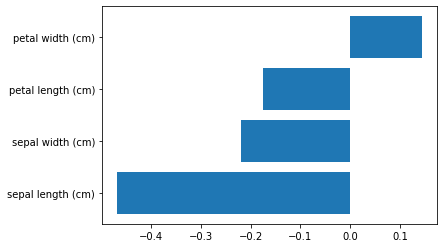

In [104]:
iris_class = 1
print(iris.target_names[iris_class], 'vs all')
features_important(clf.coef_[iris_class], iris['feature_names'])